In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib

from MieSppForce import frenel, dipoles, green_func, force

In [3]:
plt.rcParams.update({'font.size': 14})

In [3]:

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wl = 800  # [nm]
STOP = 45
dist = 20
angle = 25*np.pi/180
phase = 0
a = 0 # TM

R = np.linspace(20,120,50)
F_x = np.empty((len(R), 8))
F_y = np.empty_like(F_x)
F_z = np.empty_like(F_x)


for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    f =  force.F(wl, eps_Au, point, R[i], eps_Si, angle,amplitude=1,phase=phase,a=a, stop=STOP, full_output=True)
    F_x[i,:] = f[0]
    F_y[i,:] = f[1]
    F_z[i,:] = f[2]

  6%|▌         | 3/50 [00:02<00:41,  1.13it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 50/50 [00:46<00:00,  1.08it/s]


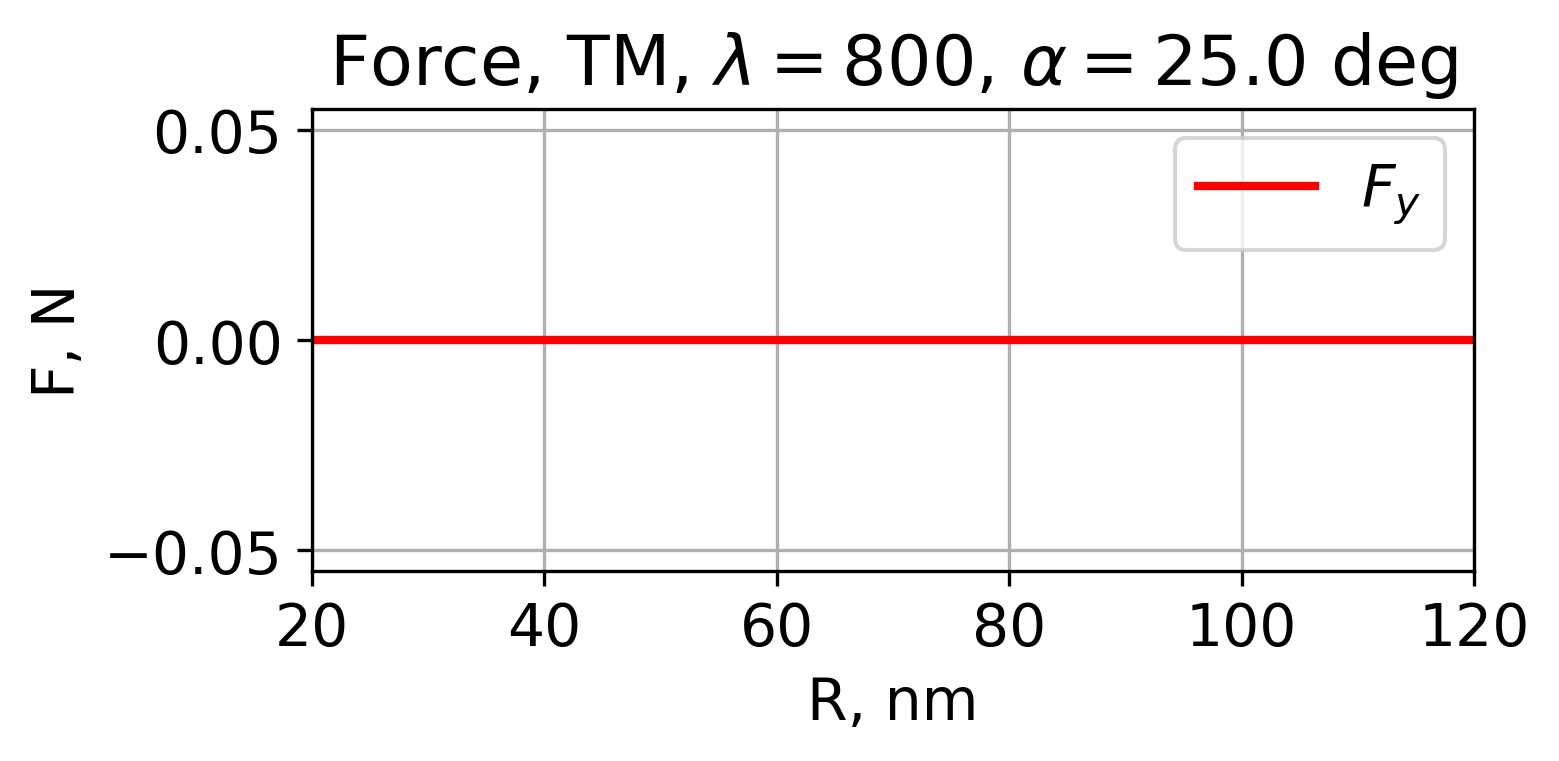

In [8]:
plt.figure(figsize=(5,2), dpi=300)
plt.plot(R, F_y[:,0], label='$F_y$', lw=2, c='red')
plt.xlim(R[0], R[-1])
plt.title(f'Force, TM, $\lambda=${wl}, $\\alpha=${round(angle*180/np.pi,1)} deg')
plt.xlabel('R, nm')
plt.ylabel('F, N')
plt.grid()
plt.legend()
plt.savefig('plots_new/F_y_TM.pdf', format="pdf", bbox_inches='tight')
plt.show()


In [18]:
STOP = 45
dist = 20
angle = 25*np.pi/180
phase = 0
a = 0 # TM
wl = 800

R = np.linspace(20,120,50)
P = np.empty((len(R), 3), dtype=complex)
M = np.empty((len(R), 3), dtype=complex)

for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R[i], eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
    p,m = p[:,0],m[:,0]
    P[i,:], M[i,:] = p,m
    

  8%|▊         | 4/50 [00:01<00:19,  2.39it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 50/50 [00:21<00:00,  2.34it/s]


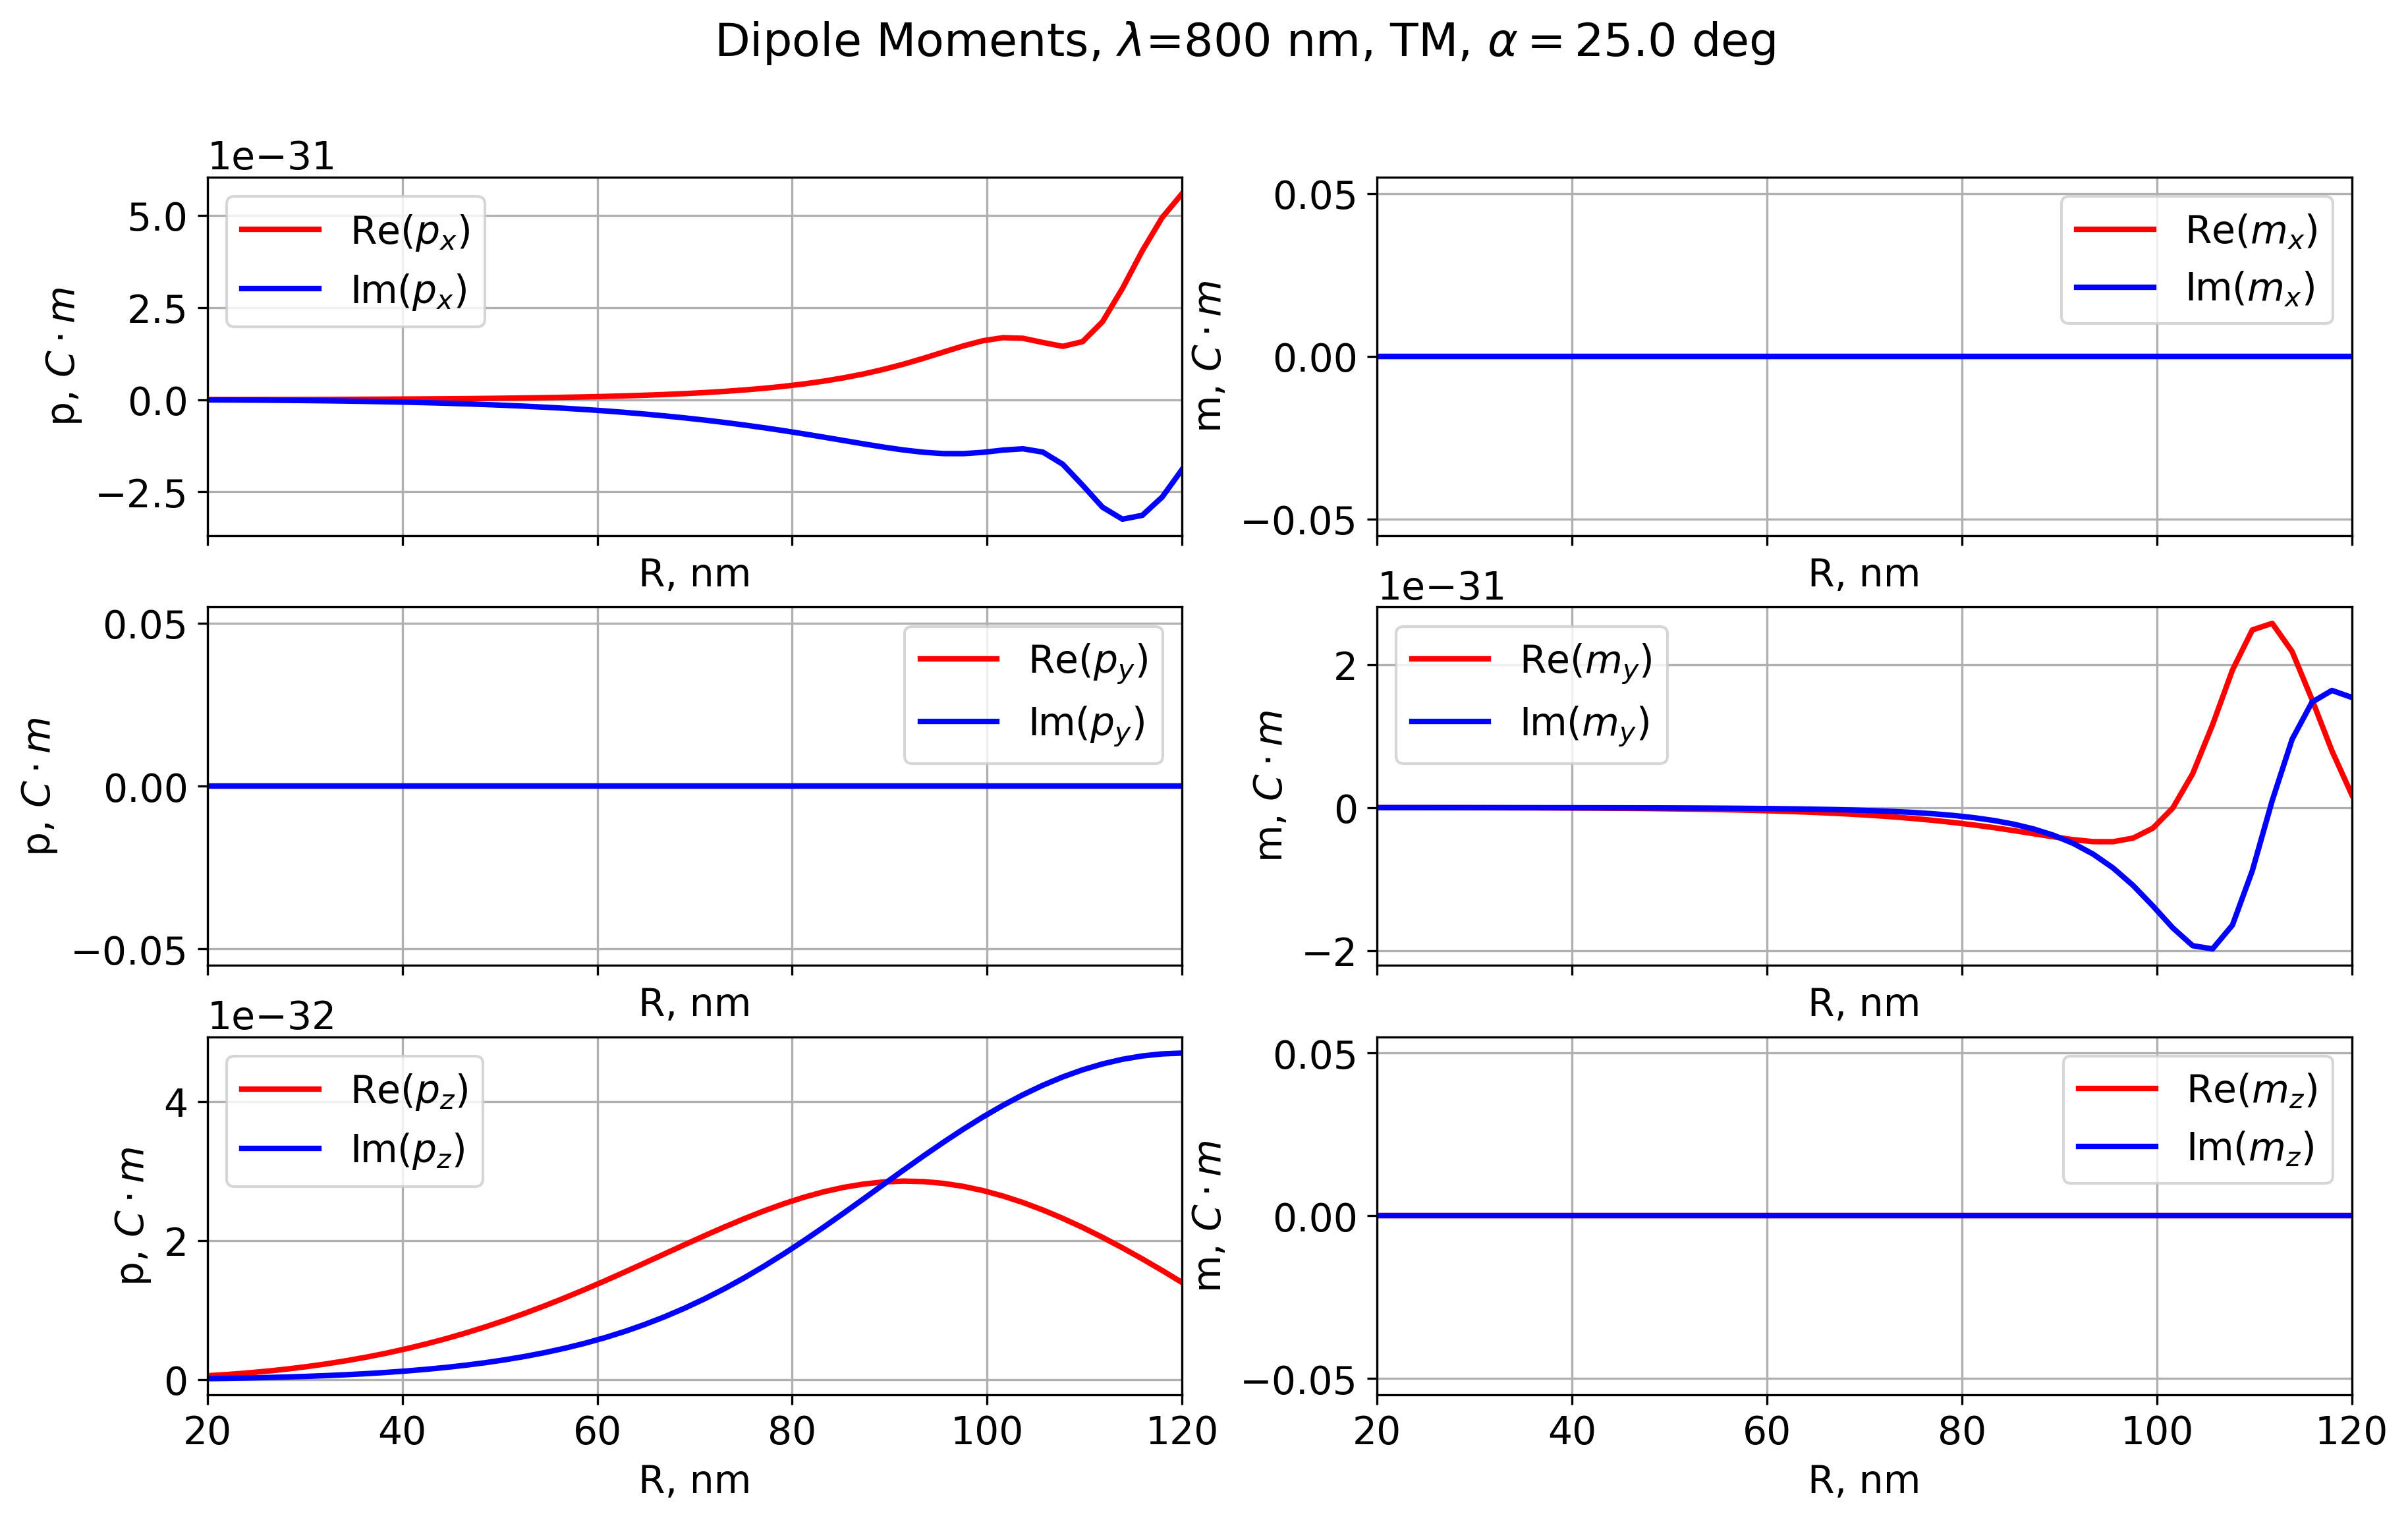

In [19]:
ncols = 2
nrows = 3
c_const = 299792458
data =[[P[:,0], M[:,0]/c_const],
       [P[:,1], M[:,1]/c_const], 
       [P[:,2], M[:,2]/c_const]]

labels = [ ['$p_x$', '$m_x$'],
           ['$p_y$', '$m_y$'],
           ['$p_z$', '$m_z$']]

fig, axs = plt.subplots(nrows,ncols, figsize=(14,8), sharex=True, dpi=300)

fig.suptitle(f"Dipole Moments, $\\lambda$={wl} nm, TM, $\\alpha=${round(angle*180/np.pi,1)} deg")


for j in range(ncols):
    for i in range(nrows):
        axs[i,j].plot(R, np.real(data[i][j]), label='Re('+labels[i][j]+')', c='red', lw=2)
        axs[i,j].plot(R, np.imag(data[i][j]), label='Im('+labels[i][j]+')', c='blue', lw=2)
        axs[i,j].legend()
        axs[i,j].grid()
        if j==0:
            axs[i,j].set_ylabel('p, $C \cdot m$')
        else:
            axs[i,j].set_ylabel('m, $C \cdot m$')
        axs[i,j].set_xlim(R[0], R[-1])
        axs[i,j].set_xlabel('R, nm')
        
plt.savefig('plots_new/Dipoles_TM.pdf', format="pdf", bbox_inches='tight')
plt.show()

In [10]:

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wl = 800  # [nm]
STOP = 45
dist = 20
angle = 25*np.pi/180
phase = 0
a = 1 # TE

R = np.linspace(20,120,50)
F_x = np.empty((len(R), 8))
F_y = np.empty_like(F_x)
F_z = np.empty_like(F_x)


for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    f =  force.F(wl, eps_Au, point, R[i], eps_Si, angle,amplitude=1,phase=phase,a=a, stop=STOP, full_output=True)
    F_x[i,:] = f[0]
    F_y[i,:] = f[1]
    F_z[i,:] = f[2]

  6%|▌         | 3/50 [00:02<00:44,  1.06it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 50/50 [00:47<00:00,  1.06it/s]


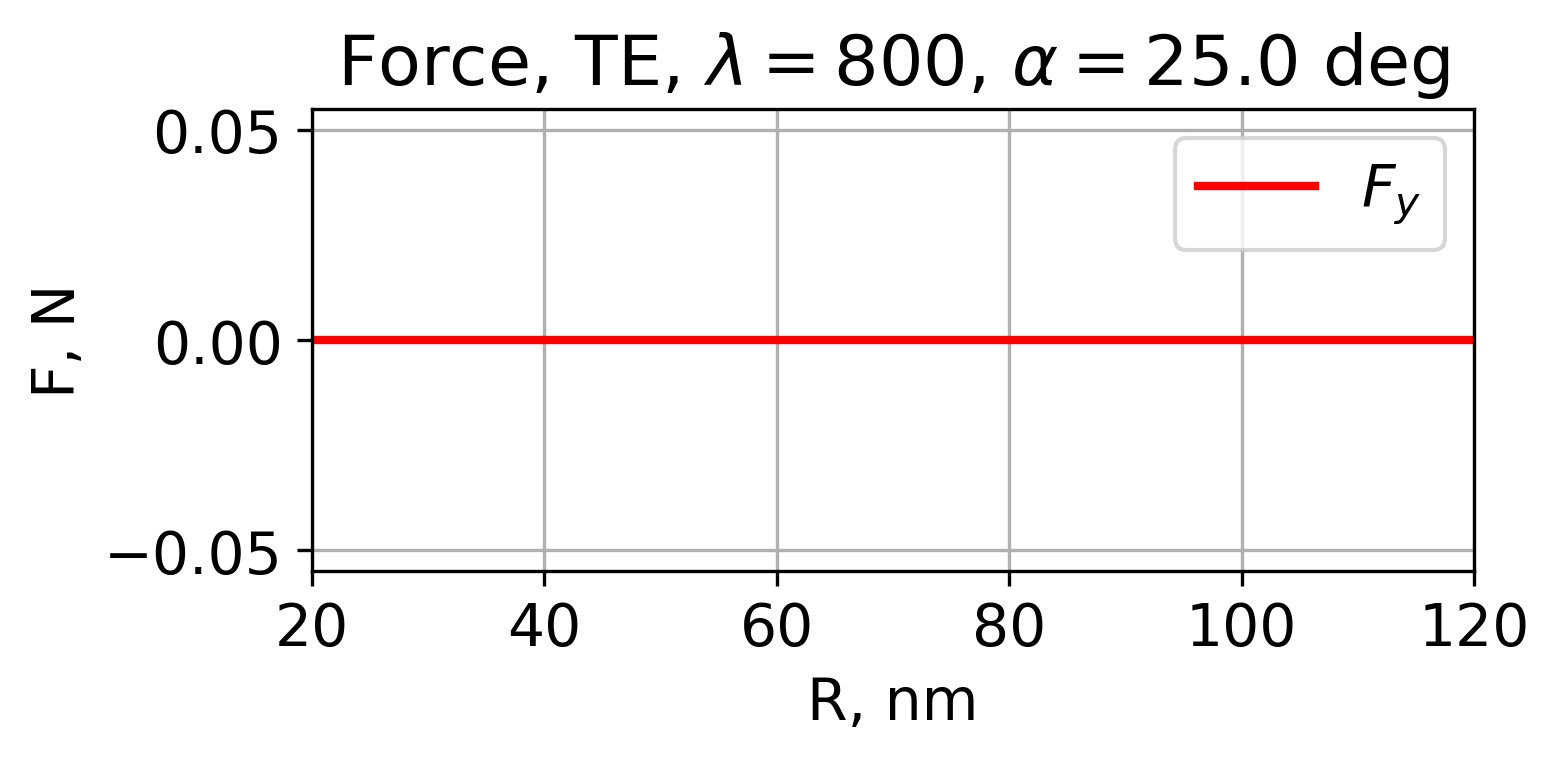

In [11]:
plt.figure(figsize=(5,2), dpi=300)
plt.plot(R, F_y[:,0], label='$F_y$', lw=2, c='red')
plt.xlim(R[0], R[-1])
plt.title(f'Force, TE, $\lambda=${wl}, $\\alpha=${round(angle*180/np.pi,1)} deg')
plt.xlabel('R, nm')
plt.ylabel('F, N')
plt.grid()
plt.legend()
plt.savefig('plots_new/F_y_TE.pdf', format="pdf", bbox_inches='tight')
plt.show()


In [20]:
STOP = 45
dist = 20
angle = 25*np.pi/180
phase = 0
a = 1 # TM
wl = 800

R = np.linspace(20,120,50)
P = np.empty((len(R), 3), dtype=complex)
M = np.empty((len(R), 3), dtype=complex)

for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R[i], eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
    p,m = p[:,0],m[:,0]
    P[i,:], M[i,:] = p,m
    

  8%|▊         | 4/50 [00:01<00:19,  2.33it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 50/50 [00:21<00:00,  2.32it/s]


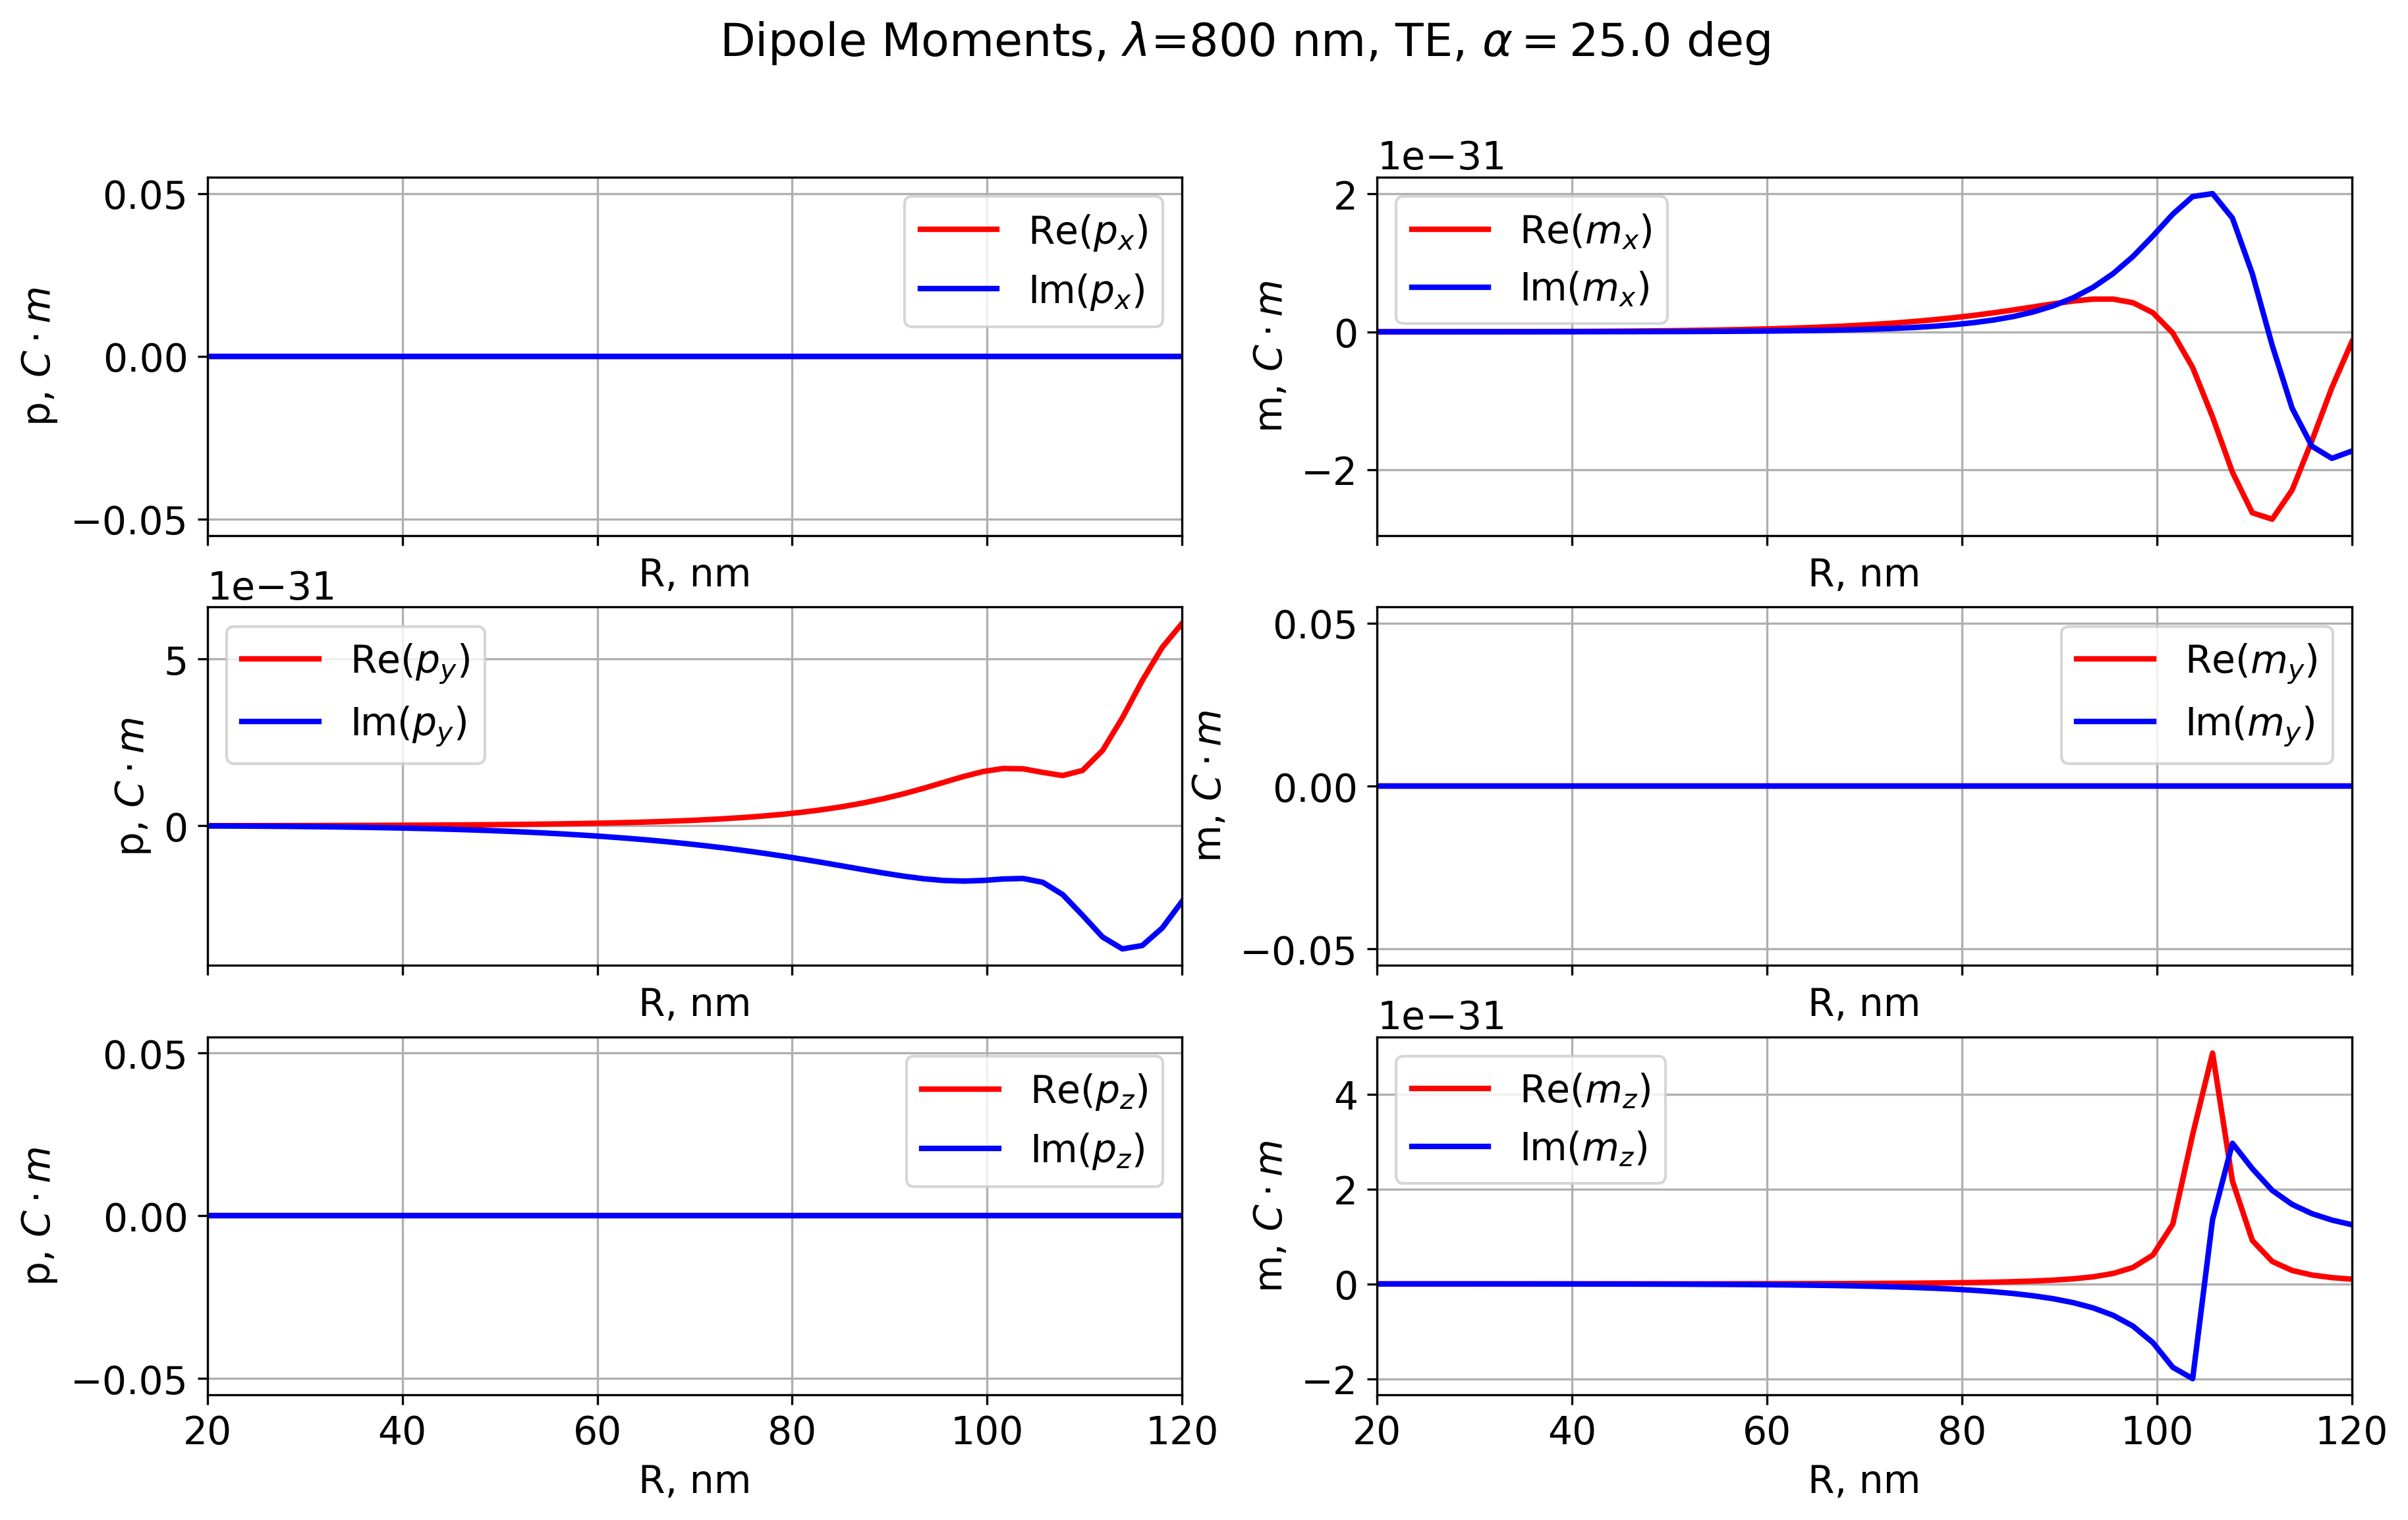

In [21]:
ncols = 2
nrows = 3
c_const = 299792458
data =[[P[:,0], M[:,0]/c_const],
       [P[:,1], M[:,1]/c_const], 
       [P[:,2], M[:,2]/c_const]]

labels = [ ['$p_x$', '$m_x$'],
           ['$p_y$', '$m_y$'],
           ['$p_z$', '$m_z$']]

fig, axs = plt.subplots(nrows,ncols, figsize=(14,8), sharex=True, dpi=300)

fig.suptitle(f"Dipole Moments, $\\lambda$={wl} nm, TE, $\\alpha=${round(angle*180/np.pi,1)} deg")


for j in range(ncols):
    for i in range(nrows):
        axs[i,j].plot(R, np.real(data[i][j]), label='Re('+labels[i][j]+')', c='red', lw=2)
        axs[i,j].plot(R, np.imag(data[i][j]), label='Im('+labels[i][j]+')', c='blue', lw=2)
        axs[i,j].legend()
        axs[i,j].grid()
        if j==0:
            axs[i,j].set_ylabel('p, $C \cdot m$')
        else:
            axs[i,j].set_ylabel('m, $C \cdot m$')
        axs[i,j].set_xlim(R[0], R[-1])
        axs[i,j].set_xlabel('R, nm')
        
plt.savefig('plots_new/dipoles_TE.pdf', format="pdf", bbox_inches='tight')
plt.show()

# Green Funcs

In [16]:
import green_func
eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wl = 800  # [nm]
STOP = 1
dist = 20
R = np.linspace(20,120,50)

GrefE00, GrefE22 = np.empty(len(R), dtype=complex), np.empty(len(R), dtype=complex)
GrefH00, GrefH22 = np.empty(len(R), dtype=complex), np.empty(len(R), dtype=complex)
rotGrefE01, rotGrefE10 = np.empty(len(R), dtype=complex), np.empty(len(R), dtype=complex)

for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    G_ref_E, G_ref_H = green_func.green_ref_00(wl, point[2], eps_Au, STOP)
    rot_G_ref_E, _ = green_func.rot_green_ref_00(wl, point[2], eps_Au, STOP)
    GrefE00[i] = G_ref_E[0,0]
    GrefE22[i] = G_ref_E[2,2]
    GrefH00[i] = G_ref_H[0,0]
    GrefH22[i] = G_ref_H[2,2]
    rotGrefE01[i] = rot_G_ref_E[0,1]
    rotGrefE10[i] = rot_G_ref_E[1,0]


  8%|▊         | 4/50 [00:00<00:06,  7.58it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 50/50 [00:06<00:00,  7.59it/s]


GrefE00 = GrefE11, 

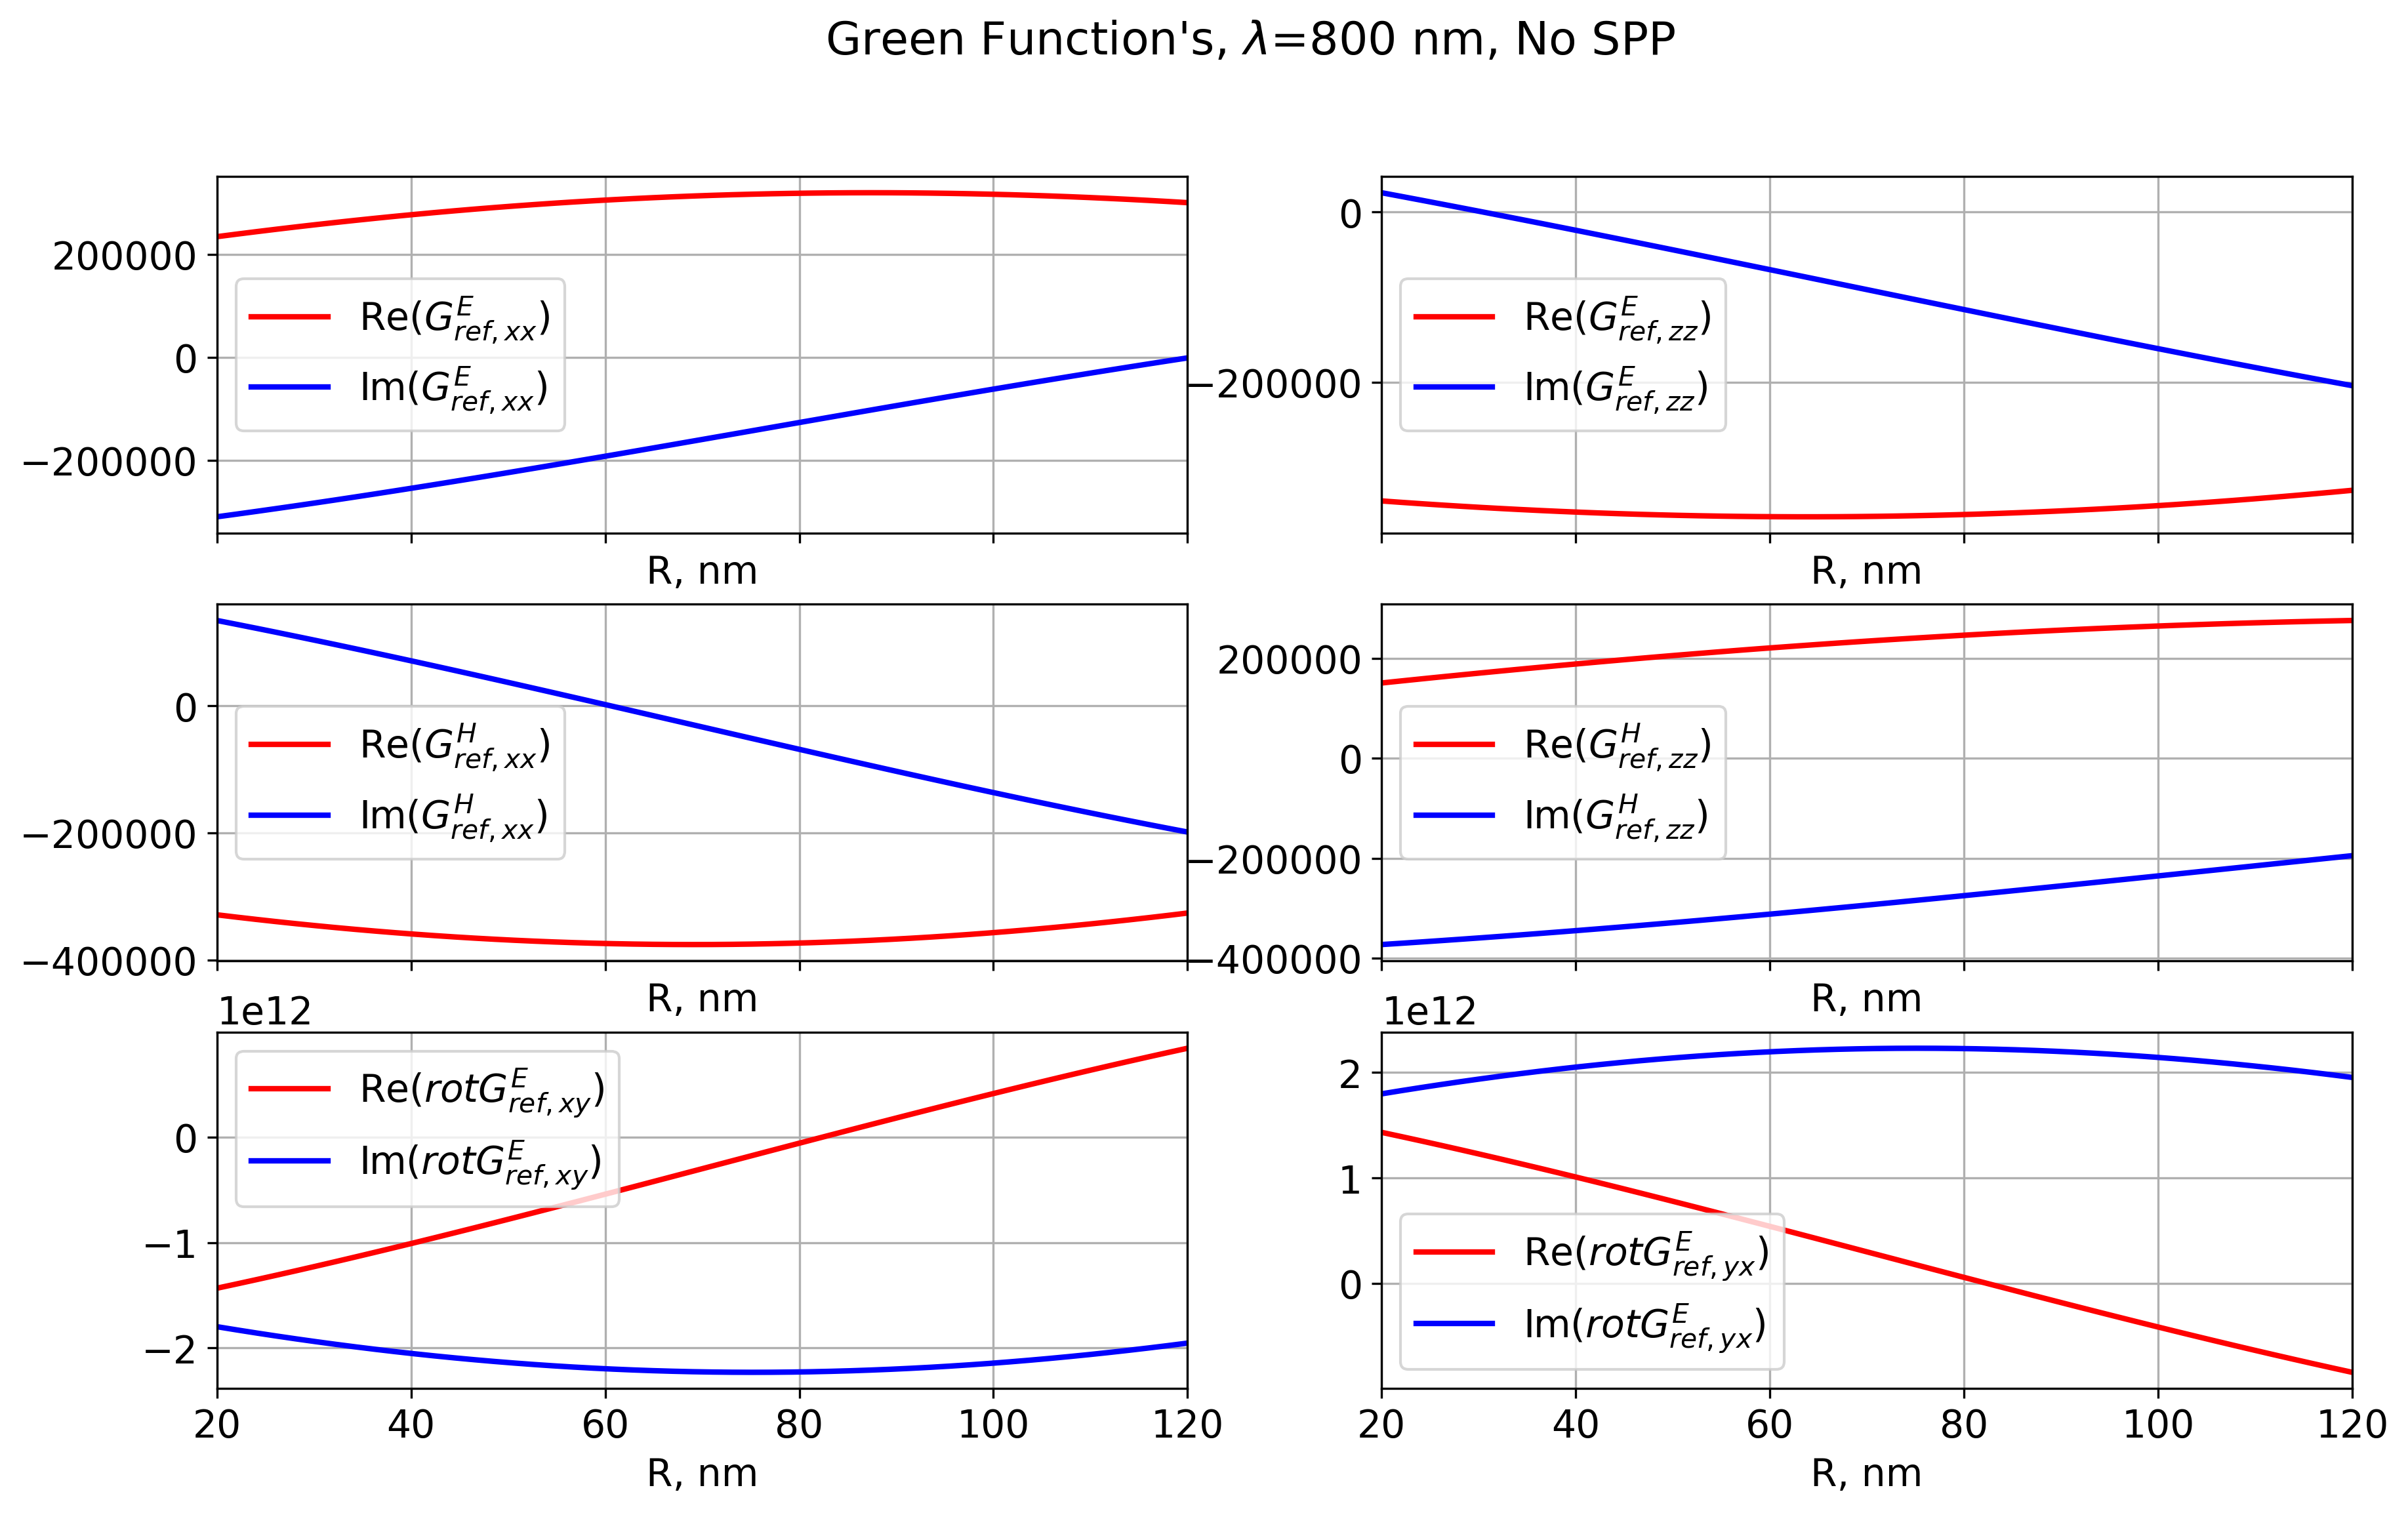

In [17]:
ncols = 2
nrows = 3

data =[[GrefE00, GrefE22], 
                 [GrefH00, GrefH22], 
                 [rotGrefE01, rotGrefE10]]

labels = [ ['$G_{ref,xx}^E$', '$G_{ref,zz}^E$'],
           ['$G_{ref,xx}^H$', '$G_{ref,zz}^H$'],
           ['$rotG_{ref,xy}^E$', '$rotG_{ref,yx}^E$']]

fig, axs = plt.subplots(nrows,ncols, figsize=(14,8), sharex=True, dpi=300)

fig.suptitle(f"Green Function's, $\\lambda$={wl} nm, No SPP")


for j in range(ncols):
    for i in range(nrows):
        axs[i,j].plot(R, np.real(data[i][j]), label='Re('+labels[i][j]+')', c='red', lw=2)
        axs[i,j].plot(R, np.imag(data[i][j]), label='Im('+labels[i][j]+')', c='blue', lw=2)
        axs[i,j].legend()
        axs[i,j].grid()
        axs[i,j].set_xlim(R[0], R[-1])
        axs[i,j].set_xlabel('R, nm')
        
plt.savefig('plots_new/Green_No_SPP.pdf', format="pdf", bbox_inches='tight')
plt.show()

# a = 0.25, 0.5, 0.75,  phase=0


In [ ]:

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wl = 800  # [nm]
STOP = 45
dist = 2
angle = 25*np.pi/180
phase = np.pi/2
a = 0.5 # TM

R = np.linspace(50,120,50)
F_x = np.empty((len(R), 8))
F_y = np.empty_like(F_x)
F_z = np.empty_like(F_x)


for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    f =  force.F(wl, eps_Au, point, R[i], eps_Si, angle,amplitude=1,phase=phase,a=a, stop=STOP, full_output=True)
    F_x[i,:] = f[0]
    F_y[i,:] = f[1]
    F_z[i,:] = f[2]

  0%|          | 0/50 [00:00<?, ?it/s]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 50/50 [02:01<00:00,  2.43s/it]


In [17]:
STOP = 1

F_x_no_spp = np.empty((len(R), 8))
F_y_no_spp = np.empty_like(F_x)
F_z_no_spp = np.empty_like(F_x)


for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    f =  force.F(wl, eps_Au, point, R[i], eps_Si, angle,amplitude=1,phase=phase,a=a, stop=STOP, full_output=True)
    F_x_no_spp[i,:] = f[0]
    F_y_no_spp[i,:] = f[1]
    F_z_no_spp[i,:] = f[2]

100%|██████████| 50/50 [00:32<00:00,  1.53it/s]


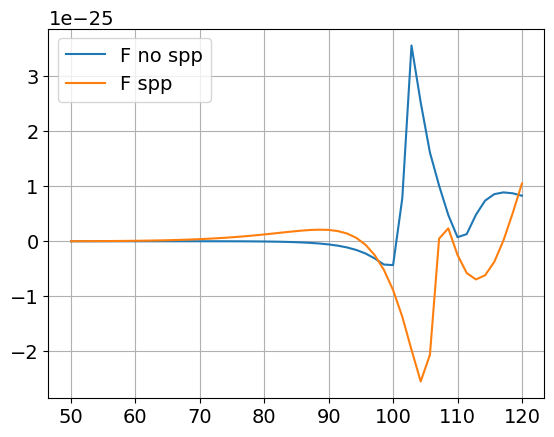

In [18]:
plt.plot(R, F_y_no_spp[:,0], label='F no spp')
plt.plot(R, F_y[:,0], label='F spp')
plt.grid()
plt.legend()
plt.show()

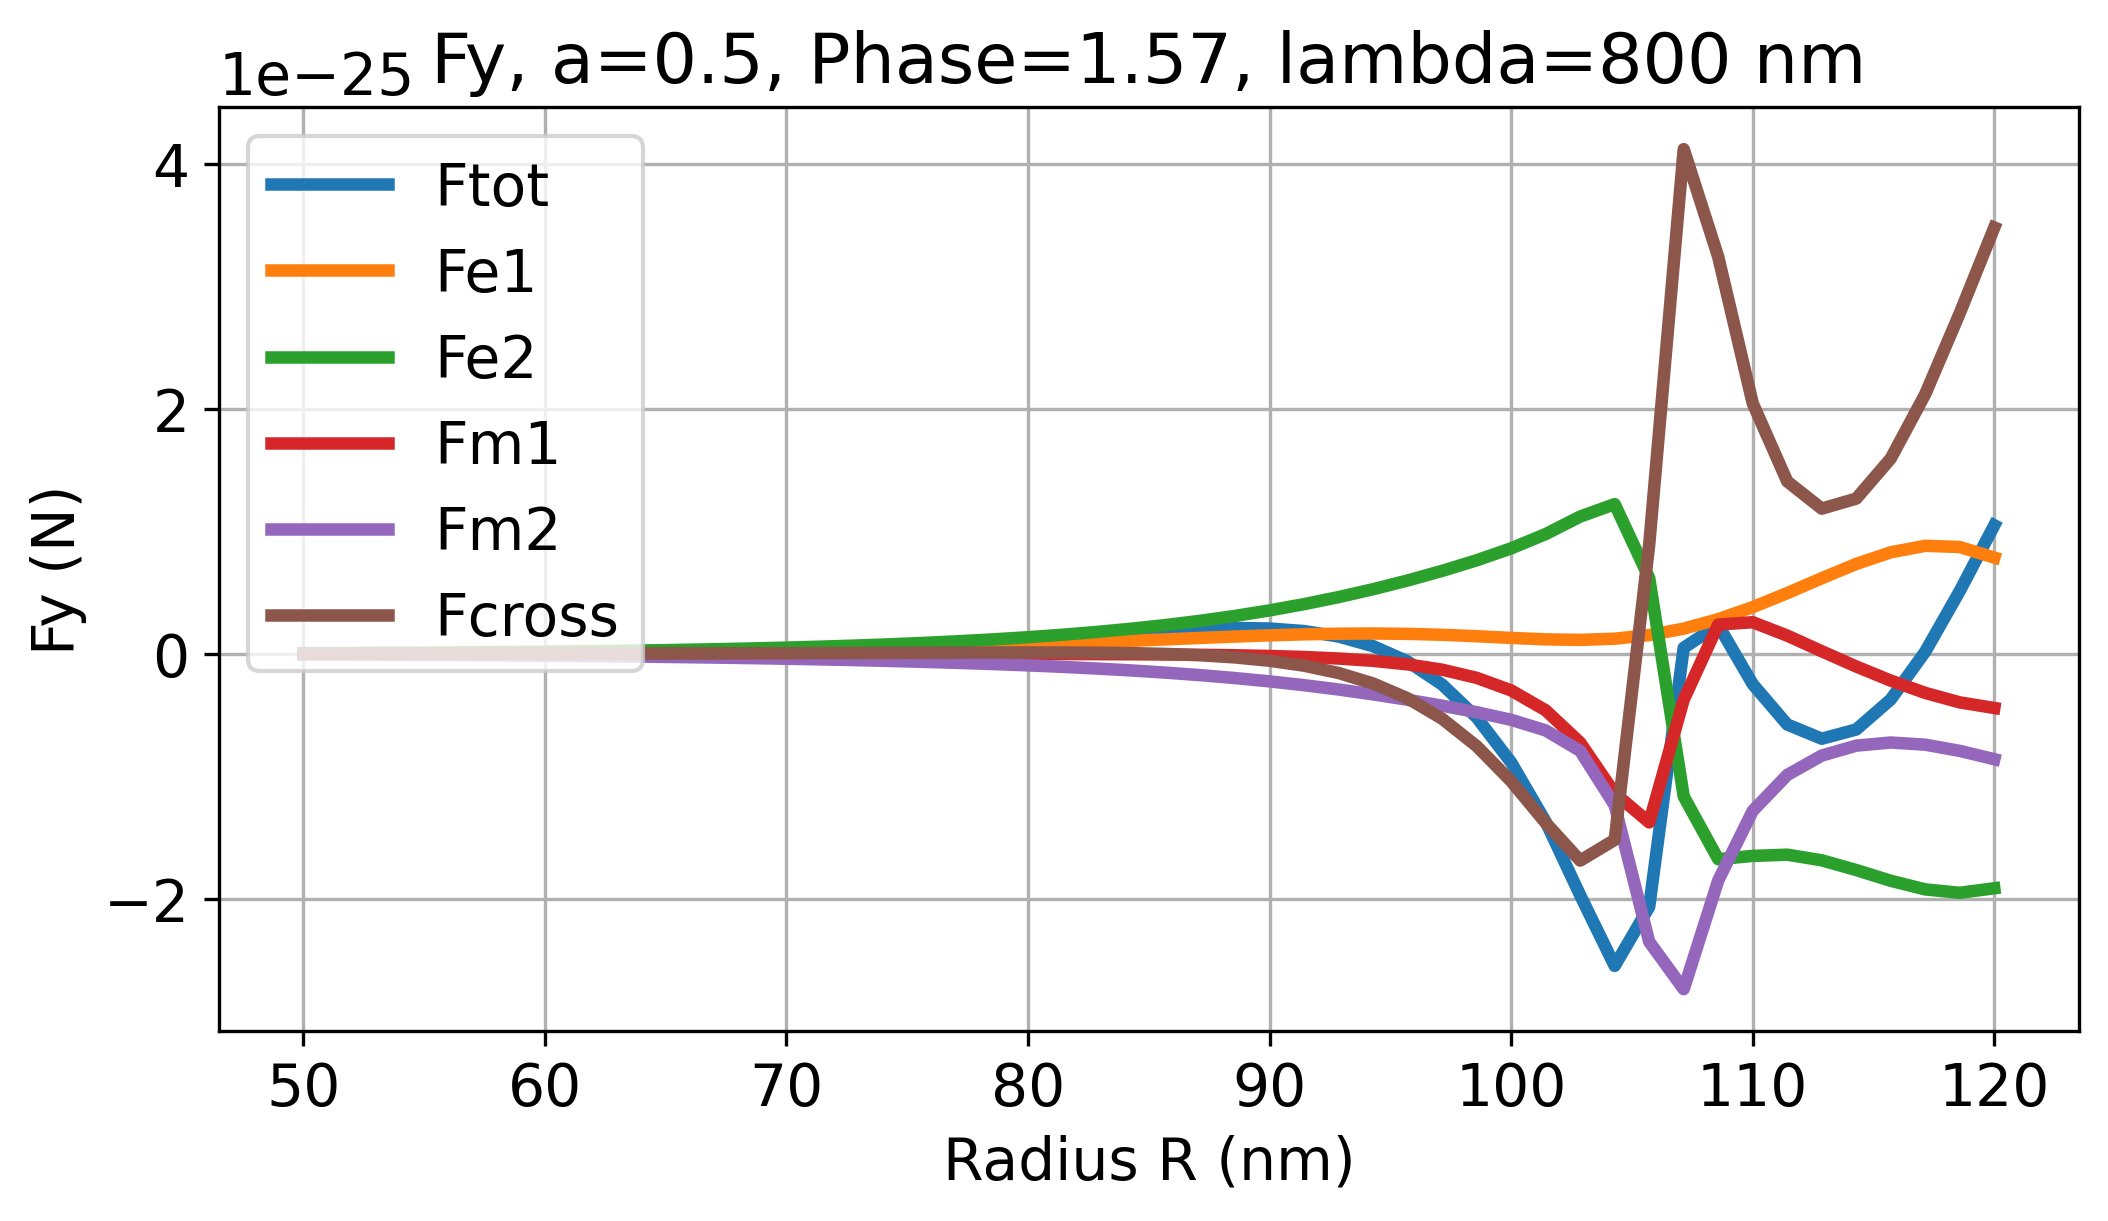

In [27]:
labels = ['Ftot', 'Fe0', 'Fe1', 'Fe2', 'Fm0', 'Fm1', 'Fm2', 'Fcross']



selected_components = [0,2,3,5,6,7]  # Choose from 0 to 7

# Plot all selected components
plt.figure(figsize=(8, 4), dpi=300)


for i, comp in enumerate(selected_components):
    plt.plot(R, F_y[:, comp], label=labels[comp], lw=3)
    


plt.xlabel('Radius R (nm)')
plt.ylabel('Fy (N)')
plt.title(f'Fy, a={a}, Phase={round(phase,2)}, lambda={wl} nm')
plt.legend(loc="upper left")
plt.grid()
#plt.savefig('Fx_partical_a05_Phase0_600nm.pdf')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\F'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\F'
C:\Users\borod\AppData\Local\Temp\ipykernel_35592\2266737081.py:4: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'Force, a={a}, $\delta \\varphi=${round(phase,2)},\n$\lambda=${wl} nm, $\\alpha=${round(angle*180/np.pi,1)} deg')
C:\Users\borod\AppData\Local\Temp\ipykernel_35592\2266737081.py:4: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'Force, a={a}, $\delta \\varphi=${round(phase,2)},\n$\lambda=${wl} nm, $\\alpha=${round(angle*180/np.pi,1)} deg')
C:\Users\borod\AppData\Local\Temp\ipykernel_35592\2266737081.py:9: SyntaxWarning: invalid escape sequence '\F'
  plt.savefig(f'plots_new\F_y_a_{a}_phase_{phase}.pdf', format="pdf", bbox_inches='tight')


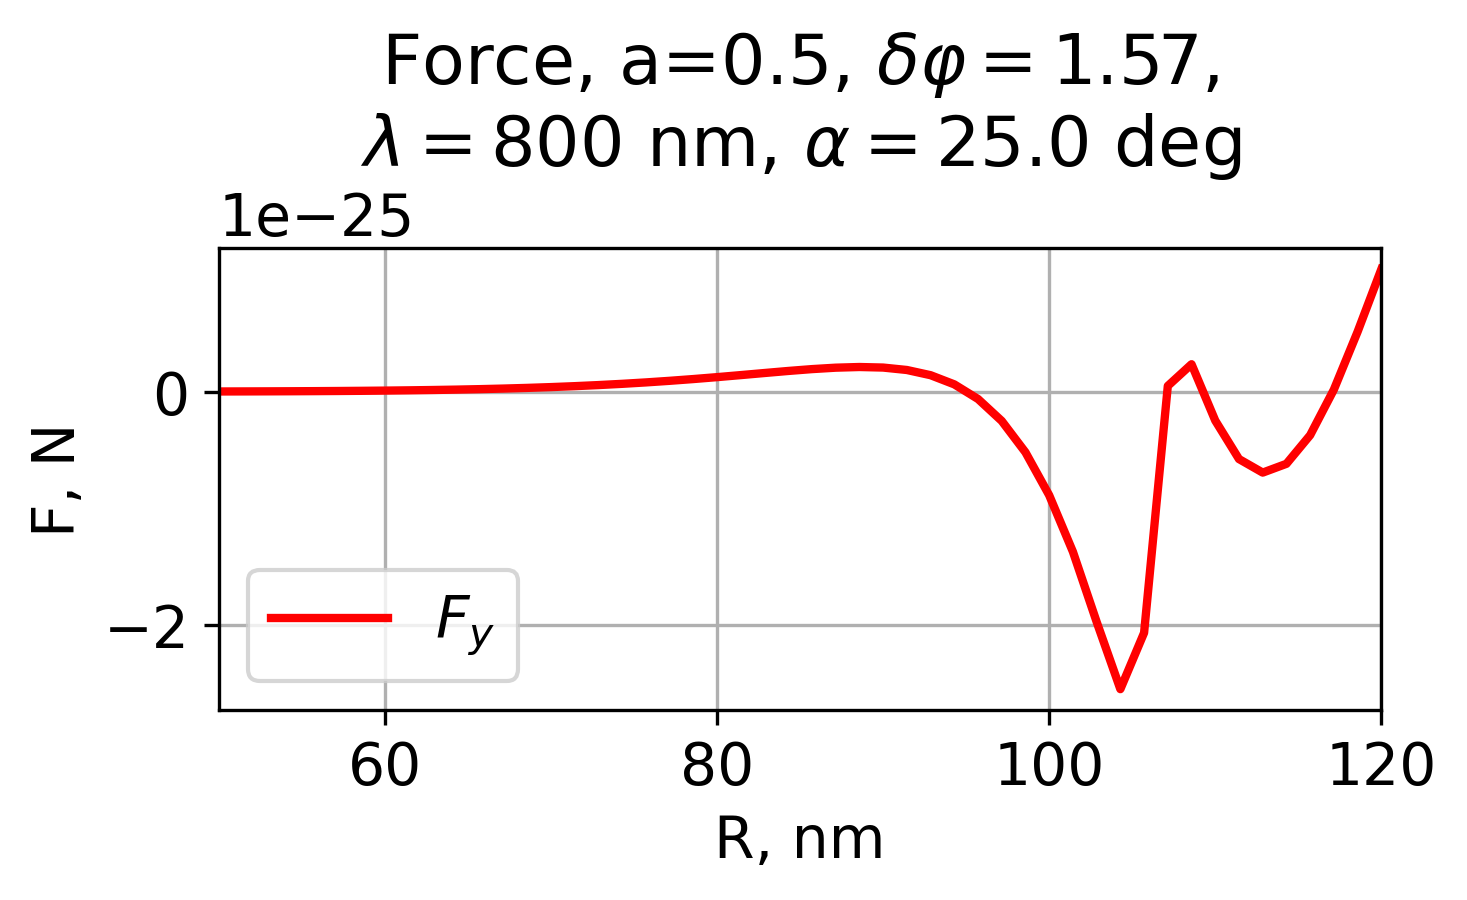

In [21]:
plt.figure(figsize=(5,2), dpi=300)
plt.plot(R, F_y[:,0], label='$F_y$', lw=2, c='red')
plt.xlim(R[0], R[-1])
plt.title(f'Force, a={a}, $\delta \\varphi=${round(phase,2)},\n$\lambda=${wl} nm, $\\alpha=${round(angle*180/np.pi,1)} deg')
plt.xlabel('R, nm')
plt.ylabel('F, N')
plt.grid()
plt.legend()
plt.savefig(f'plots_new\F_y_a_{a}_phase_{phase}.pdf', format="pdf", bbox_inches='tight')
plt.show()


In [22]:
STOP = 45
P = np.empty((len(R), 3), dtype=complex)
M = np.empty((len(R), 3), dtype=complex)

for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R[i], eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
    p,m = p[:,0],m[:,0]
    P[i,:], M[i,:] = p,m
    

  0%|          | 0/50 [00:00<?, ?it/s]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 50/50 [00:58<00:00,  1.17s/it]


In [32]:
STOP = 45

dyGyzH = np.empty(len(R), dtype=complex)
dyGyzE = np.empty(len(R), dtype=complex)
dy_rot_G_xz_H = np.empty(len(R), dtype=complex)
dy_rot_G_zx_H = np.empty_like(dy_rot_G_xz_H)


for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    dy_G_E, dy_G_H = green_func.dy_green_E_H(wl, point[2], eps_Au, STOP)
    dy_rot_G_E, dy_rot_G_H = green_func.dy_rot_green_E_H(wl, point[2], eps_Au, STOP)
    dyGyzE[i] = dy_G_E[1,2]
    dyGyzH[i] = dy_G_H[1,2]
    dy_rot_G_xz_H[i] = dy_rot_G_H[0,2]
    dy_rot_G_zx_H[i] = dy_rot_G_H[2,0]

  0%|          | 0/50 [00:00<?, ?it/s]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 50/50 [00:21<00:00,  2.35it/s]


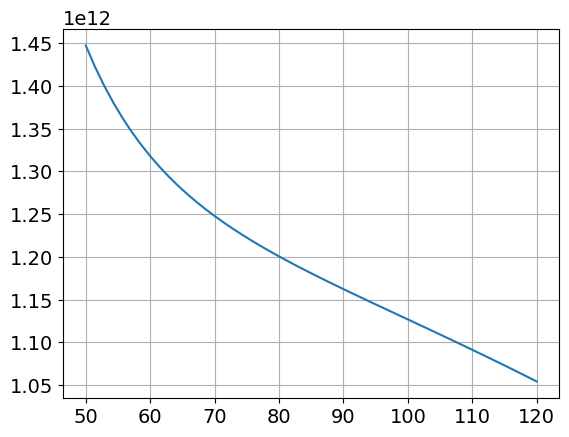

In [35]:
plt.plot(R, np.imag(dyGyzE))
plt.grid()

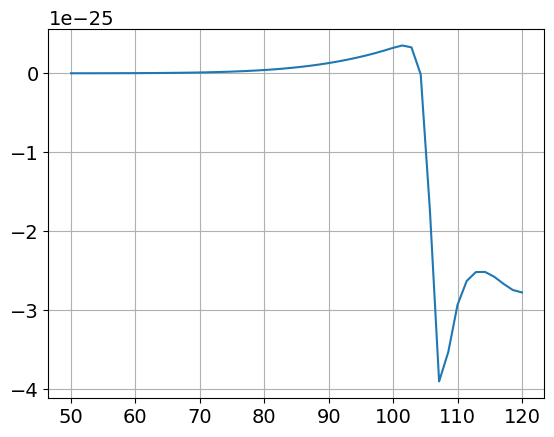

In [29]:
plt.plot(R, F_y[:,3]+F_y[:,6])
plt.grid()

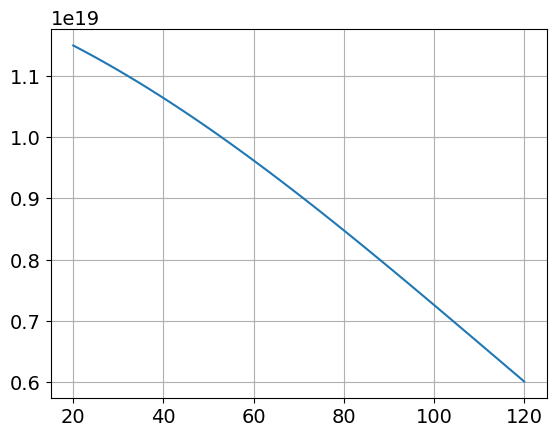

In [80]:
plt.plot(R, np.imag(dy_rot_G_xz_H))
plt.grid()

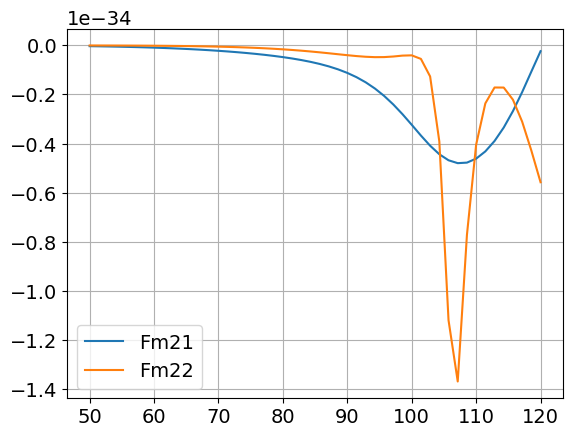

In [33]:
plt.plot(R, -np.imag(np.conj(M[:,0])*P[:,2]*dy_rot_G_zx_H), label='Fm21')
plt.plot(R, -np.imag(np.conj(M[:,2])*P[:,0]*dy_rot_G_xz_H), label='Fm22')
plt.legend()
plt.grid()

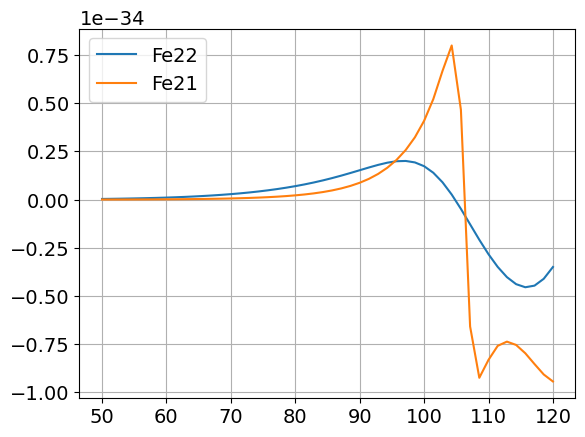

In [34]:
plt.plot(R, -np.imag(np.conj(P[:,2])*M[:,0]*dy_rot_G_zx_H), label='Fe22')
plt.plot(R, -np.imag(np.conj(P[:,0])*M[:,2]*dy_rot_G_xz_H), label='Fe21')
plt.legend()
plt.grid()

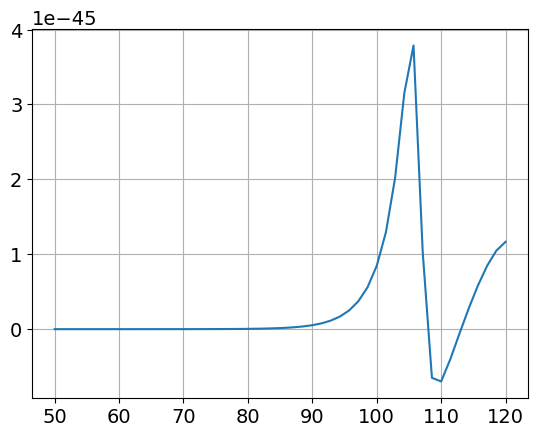

In [36]:
plt.plot(R, -np.imag(np.conj(M[:,1])*M[:,2]))
plt.grid()

<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
C:\Users\borod\AppData\Local\Temp\ipykernel_35592\559892212.py:14: SyntaxWarning: invalid escape sequence '\d'
  fig.suptitle(f"Dipole Moments, $\\lambda$={wl} nm, a={a}, \n$\delta \\varphi=${round(phase,2)}, $\\alpha=${round(angle*180/np.pi,1)} deg")
C:\Users\borod\AppData\Local\Temp\ipykernel_35592\559892212.py:24: SyntaxWarning: invalid escape sequence '\c'
  axs[i,j].set_ylabel('p, $C \cdot m$')
C:\Users\borod\AppData\Local\Temp\ipykernel_35592\559892212.py:26: SyntaxWarning: invalid escape sequence '\c'
  axs[i,j].set_ylabel('m, $C \cdot m$')


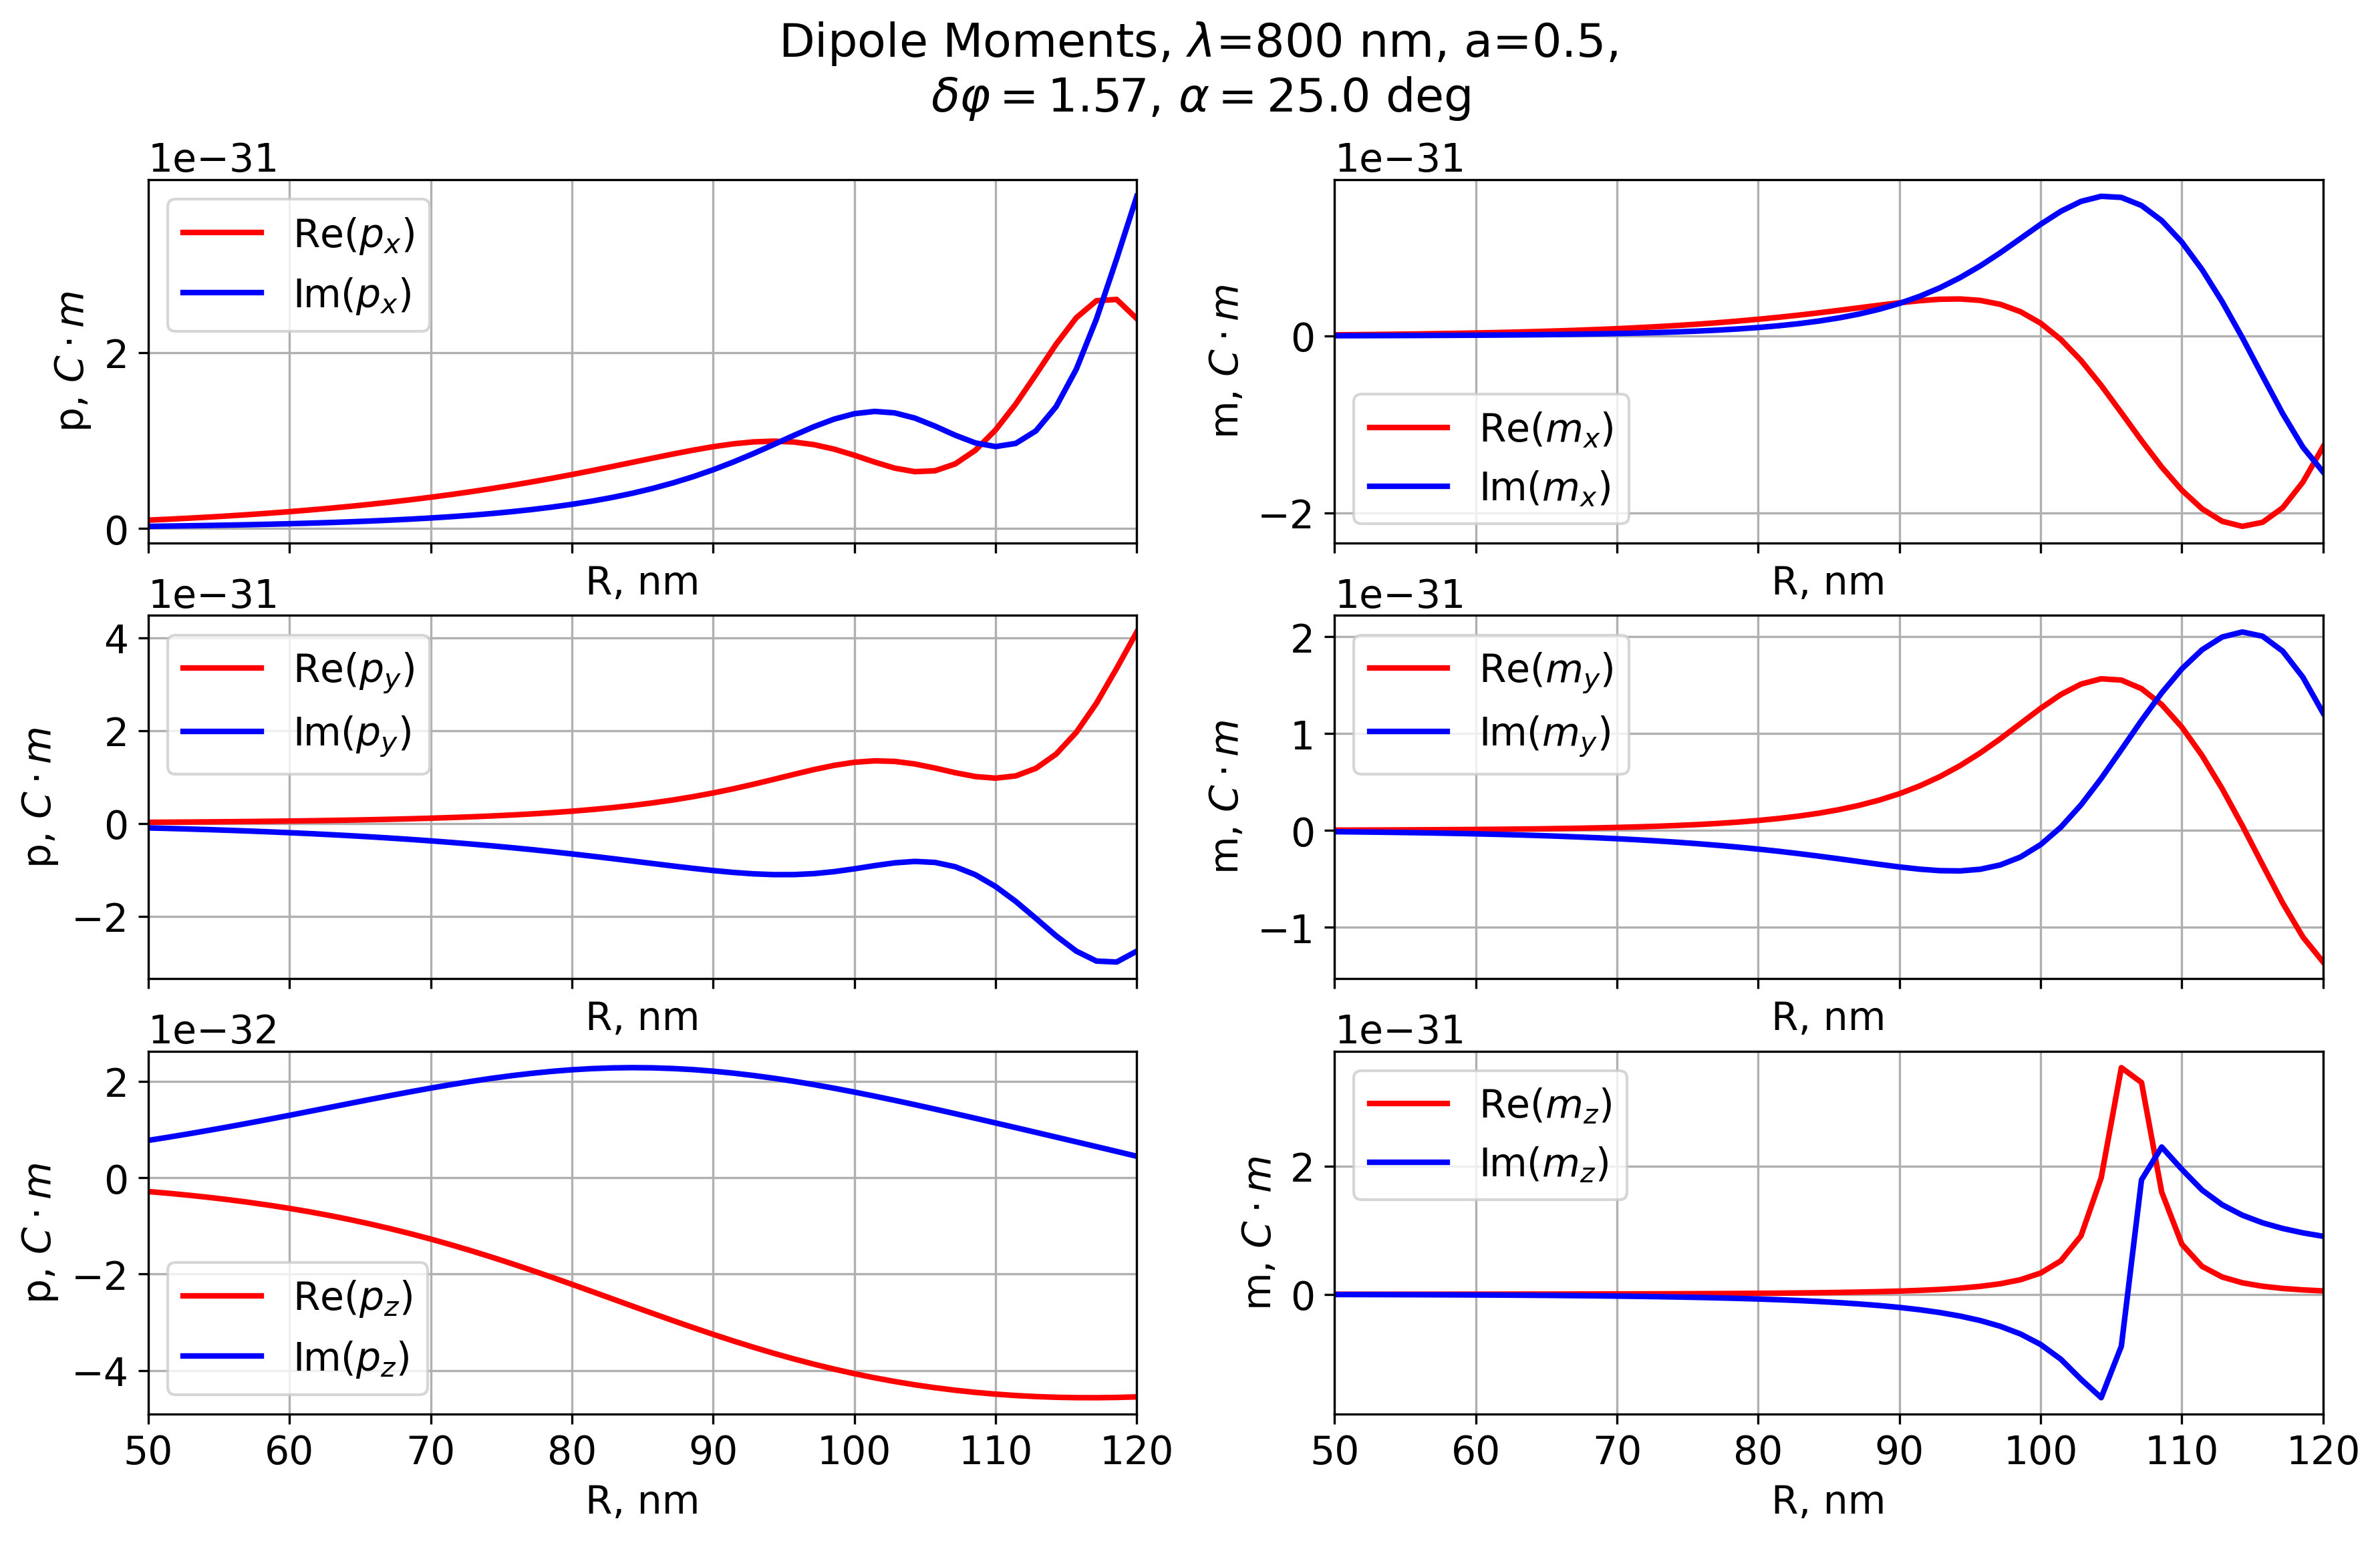

In [23]:
ncols = 2
nrows = 3
c_const = 299792458
data =[[P[:,0], M[:,0]/c_const],
       [P[:,1], M[:,1]/c_const], 
       [P[:,2], M[:,2]/c_const]]

labels = [ ['$p_x$', '$m_x$'],
           ['$p_y$', '$m_y$'],
           ['$p_z$', '$m_z$']]

fig, axs = plt.subplots(nrows,ncols, figsize=(14,8), sharex=True, dpi=300)

fig.suptitle(f"Dipole Moments, $\\lambda$={wl} nm, a={a}, \n$\delta \\varphi=${round(phase,2)}, $\\alpha=${round(angle*180/np.pi,1)} deg")


for j in range(ncols):
    for i in range(nrows):
        axs[i,j].plot(R, np.real(data[i][j]), label='Re('+labels[i][j]+')', c='red', lw=2)
        axs[i,j].plot(R, np.imag(data[i][j]), label='Im('+labels[i][j]+')', c='blue', lw=2)
        axs[i,j].legend()
        axs[i,j].grid()
        if j==0:
            axs[i,j].set_ylabel('p, $C \cdot m$')
        else:
            axs[i,j].set_ylabel('m, $C \cdot m$')
        axs[i,j].set_xlim(R[0], R[-1])
        axs[i,j].set_xlabel('R, nm')
        
plt.savefig(f'plots_new/Dipoles_a_{a}_phase_{round(phase,2)}.pdf', format="pdf", bbox_inches='tight')
plt.show()